In [2]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

Using matplotlib backend: <object object at 0x0000024AC7D27640>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


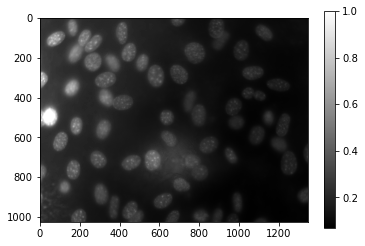

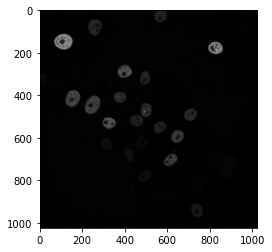

In [11]:
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
figure()  
imshow(img_1, 'gray')
colorbar()

img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 
figure()  
imshow(img_2, 'gray')


In [6]:
def otsu_thresholding(img, x):
  
   
    n, bins, patches = plt.hist(img.flatten(),log = 'False', bins = x)
    #print(len(bins))
    thres = 0
    copy = img.copy()
    bcv = list()
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            

        w0 = w0_sum / sum(n)    
        mean_0 = mean_sum0 / sum(n[0:i+1])
        
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]
            
        w1 = w1_sum / sum(n)
     
        mean_1 = mean_sum1 / sum(n[i+1:len(n)])

        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        
        v1 = v1_sum / sum(n[i+1:len(n)])
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    optimal_thres = min(bcv)
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = bins[l]
        l += 1


    for o in ndindex(copy.shape):
        if copy[o] < (thres): 
            copy[o] = 0
        else:
            copy[o] = 255

    #figure()  
    #imshow(copy, 'gray')
    #colorbar()

    return optimal_thres 

C:\Users\marie\AppData\Local\Temp\ipykernel_12140\1678136461.py:39: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_12140\1678136461.py:44: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


1000
36.41101760146688
[36.41101760146688, 37.50337725005962, 38.63206882406256, 39.119048423829845, 39.092432991260786, 39.474826556016815, 39.2231700454942, 39.51092935806027, 39.8129463404332, 39.617824201504675, 40.007952545669525, 39.84072762869819, 39.68585356981273, 39.869855703425884, 39.98653209164295, 39.836632472049764, 39.949218697837544, 39.892059465550815, 39.91830818731382]


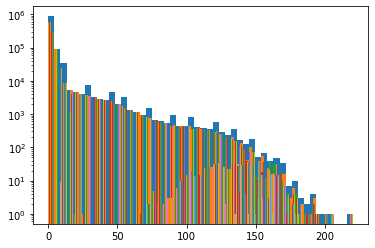

In [13]:
i = 50
threshold = list()
while i < 1000: 
    threshold.append(otsu_thresholding(img_2, i))
    i += 50 
print(i) 
optimal_wcv = min(threshold)
print(optimal_wcv)
print(threshold)